In [ ]:
size = 20
features = 2
traits = range(2,100)
results = {}
results['trait'] = []
results['cultureDensityMean'] = []
results['cultureDensityStd'] = []
results['cultureDensitySum'] = []
for trait in traits:
    print("\n\n--->",trait,end=" ")
    cultureDensity = []
    cultureMax=[]
    cultureSum = []
    for iteration in range(0,100):
        graph = generateGraph(size) 
        model = AxelrodModel(graph,traits=trait,features=features)
        cultureDomain = model.runSimulation(patience = 100)
        cultures = list(cultureDomain.values())
        cultureMax.append(np.max(cultures))
        cultureSum.append(np.sum(cultures))
        cultureDensity.append(np.max(cultures)/np.sum(cultures))
        print(iteration,end=" ")
    results['trait'].append(trait)
    results['cultureDensityMean'].append(np.mean(cultureDensity))
    results['cultureDensityStd'].append(np.std(cultureDensity))
    results['cultureDensitySum'].append(np.mean(cultureSum))

        



---> 2 - 0 0 - 0 1 - 0 2 - 0 3 - 0 4 - 0 5 - 0 6 - 0 7 - 0 8 - 0 9 - 0 10 - 0 11 - 0 12 - 0 13 - 0 14 - 0 15 - 0 16 - 0 17 - 0 18 - 0 19 - 0 20 - 0 21 - 0 22 - 0 23 - 0 24 - 0 25 - 0 26 - 0 27 - 0 28 - 0 29 - 0 30 - 0 31 - 0 32 - 0 33 - 0 34 - 0 35 - 0 36 - 0 37 - 0 38 - 0 39 - 0 40 - 0 41 - 0 42 - 0 43 - 0 44 - 0 45 - 0 46 - 0 47 - 0 48 - 0 49 - 0 50 - 0 51 - 0 52 - 0 53 - 0 54 - 0 55 - 0 56 - 0 57 - 0 58 - 0 59 - 0 60 - 0 61 - 0 62 - 0 63 - 0 64 - 0 65 - 0 66 - 0 67 - 0 68 - 0 69 - 0 70 - 0 71 - 0 72 - 0 73 - 0 74 - 0 75 - 0 76 - 0 77 - 0 78 - 0 79 - 0 80 - 0 81 - 0 82 - 0 83 - 0 84 - 0 85 - 0 86 - 0 87 - 0 88 - 0 89 - 0 90 - 0 91 - 0 92 - 0 93 - 0 94 - 0 95 - 0 96 - 0 97 - 0 98 - 0 99 

---> 3 - 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 

In [2]:
results

{'cultureDensityMean': [],
 'cultureDensityStd': [],
 'cultureDensitySum': [],
 'trait': []}

In [ ]:
#Plotting
%matplotlib inline
import matplotlib.pyplot as plt
# Plot 1 subplots
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True,figsize=(15, 8))# Leave space for the legend on bottom and remove some space from the top
#axes.plot(results['probabilities'],[p/1800 for p in results["beginningPairCounts"]],marker='o', label="Before Simulation")
opposingPairDensity = []
stds = []
axes.errorbar(results['trait'],result["cultureDensityMean"],yerr=result["cultureDensityStd"],fmt='o-', label="After Simulation")
ticks = np.arange(0,np.max(results['probabilities'])+0.2,0.1)
plt.xticks(ticks)
plt.xlabel('Trait Count', fontsize=12)
plt.ylabel('average culture Density', fontsize=12)
plt.legend(loc='best')
plt.title("Alexrod Model: Average Culture density vs trait count, N = 20, repetetion = 100",fontsize=16)

In [6]:
#This time lets do it in a different way, the graph way
#Alexander model
from matplotlib import pyplot as plt
%matplotlib inline
class Node:
    def __init__(self,index = None,value=None,label=None):
        self.value = value
        self.index = index
        self.label = label
        

class Graph:
    def __init__(self):
        self.nodeCount = 0
        self.__adjacencyList = {}
        self.nodeList = {}
    
    def createEdge(self,node,listOfNodes=[]):
        self.__adjacencyList[node.index].update(listOfNodes)
        for n in listOfNodes:
            self.__adjacencyList[n.index].add(node)
    
    def getAdjacencyList(self):
        aList={}
        for n in self.__adjacencyList:
            aList[n] = [node.index for node in self.__adjacencyList[n]]
        return aList
    
    def getNeighbours(self,node):
        return self.__adjacencyList[node.index]
    
    def getSimilarLabels(self):
        labels = {}
        for nindex in self.nodeList:
            label = self.nodeList[nindex].label
            if label in labels:
                labels[label]+=1
            else:
                labels[label] = 1
        return labels
    
    def createNode(self,index=None,value=None):
        self.nodeCount +=1
        if index==None:
            index = self.nodeCount
        node = Node(index,value)
        self.nodeList[node.index] = node
        self.__adjacencyList[node.index] = set()
        return node
    
    def getNode(self,index):
        return self.nodeList[index]
        
    def visualizeGraph2D(self,colorFunc):
        fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False,figsize=(18, 18))# Leave space for the legend on bottom and remove some space from the top
        maxXIndex = -1
        maxYIndex = -1
        for nodeIndex in self.nodeList:
            index = [int(i) for i in nodeIndex.split(',')]
            if maxXIndex < index[0]:
                maxXIndex = index[0]
            if maxYIndex < index[1]:
                maxYIndex = index[1]
            plt.plot(index[0],index[1],'o',color=colorFunc(index))
            plt.annotate(self.getNode(nodeIndex).value,(index[0],index[1]),((index[0]+0.04,index[1]+0.04)))
            plt.annotate(self.getNode(nodeIndex).label,(index[0],index[1]),((index[0]-0.04,index[1]+0.1)))
            for neighbour in self.__adjacencyList[nodeIndex]:
                nindex = [int(i) for i in neighbour.index.split(',')]
                points = [i for i in zip(index,nindex)]
                plt.plot(points[0],points[1],'r-',alpha=0.5)
        plt.title("Graph in 2D")
        plt.xticks(range(-1,maxXIndex+2))
        plt.yticks(range(-1,maxYIndex+2))
        plt.show()
        

In [7]:
## We have a 20 X 20 lattice so total 400 sites
def getColor(index):
    return 'b'

def generateGraph(size):
    graph = Graph()
    def buildIndex(indexList):
        return ','.join([str(i) for i in indexList])

    for i in range(size):
        for j in range(size):
            node = graph.createNode(buildIndex([i,j]))
            if j-1 >=0:
                graph.createEdge(node,[graph.getNode(buildIndex([i,j-1]))])
            if i-1 >=0:
                graph.createEdge(node,[graph.getNode(buildIndex([i-1,j]))])
    return graph


In [8]:
#Axelrod model
import random
import numpy as np
import itertools
class AxelrodModel:
    def __init__(self,graph,traits=2,features=2,isInitialized=False):
        self.traits = traits
        self.features = features
        self.graph = graph
        if not isInitialized:
            self.initializeGraph()
        self.labelList = self.generateLabelList()
        self.shuffle = False
        self.cheatMode = False
        self.updateCycleCount = 0
    
    def initializeGraph(self):
        features = np.zeros(self.features)
        for node in self.graph.nodeList.values():
            node.value = [random.randrange(2,self.traits+1) for i in range(self.features)]
    
    def chooseRandomNeighbour(self,node):
        neighbours = list(self.graph.getNeighbours(node))
        rndm = random.randint(0,len(neighbours)-1)
        return neighbours[rndm]
    
    def matchedFraction(self,node1,node2):
        match = []
        unmatch = []
        for ix,val in enumerate(node1.value):
            if val == node2.value[ix]:
                match.append(ix)
            else:
                unmatch.append(ix)
        return len(match)/self.features,unmatch
        
    
    def randomUpdateCycle(self):
        randomIndex = random.randint(0,len(self.graph.nodeList)-1)
        randomNodeIndex = list(self.graph.nodeList.keys())[randomIndex]
        randomNode = self.graph.nodeList[randomNodeIndex]
        randomNeighbour = self.chooseRandomNeighbour(randomNode)
        f,unmatchedComponents = self.matchedFraction(randomNode,randomNeighbour)
        if f > random.uniform(0,1) and len(unmatchedComponents) > 0:
            self.shuffle = self.shuffle | True
            componentIndex = unmatchedComponents[random.randrange(0,len(unmatchedComponents))]
            randomNode.value[componentIndex] = randomNeighbour.value[componentIndex]
    
    def compareNodes(self,node1,node2):
        match = []
        unmatch = []
        for ix,val in enumerate(node1.value):
            if val == node2.value[ix]:
                match.append(ix)
            else:
                unmatch.append(ix)
        return len(match),len(unmatch)
            
    def checkStationaryState(self):
        #All the sites in lattice should have identical or different values
        stationaryNodes = 0
        for nodeIndex in self.graph.nodeList:
            similarValues = 0
            disSimilarValues = 0
            node = self.graph.nodeList[nodeIndex]
            neighbours = self.graph.getNeighbours(node)
            passiveNeighbour = 0
            for neighbour in neighbours:
                match,unmatch = self.compareNodes(node,neighbour)
                if match == self.features or unmatch == self.features:
                    passiveNeighbour+=1
            if passiveNeighbour == len(neighbours):
                stationaryNodes +=1
        
        if len(self.graph.nodeList) > stationaryNodes :
            return False
        else:
            return True
        
    def generateLabelList(self):
        labelList={}
        label = 0
        for l in itertools.product(list(range(2,self.traits+1)),repeat =self.features):
            labelList[str(l)] = label
            label +=1
        return labelList

    def assignLabelsToGraph(self):
        for nodeIndex in self.graph.nodeList:
            node = self.graph.nodeList[nodeIndex]
            node.label = self.labelList[str(tuple(node.value))]


    def getCulturalDomain(self):
        self.assignLabelsToGraph()
        return self.graph.getSimilarLabels()

    def getNonStationaryNodes(self):
        nonStationaryNodes = set()
        for nodeIndex in self.graph.nodeList:
            similarValues = 0
            disSimilarValues = 0
            node = self.graph.nodeList[nodeIndex]
            neighbours = self.graph.getNeighbours(node)
            passiveNeighbour = 0
            for neighbour in neighbours:
                match,unmatch = self.compareNodes(node,neighbour)
                if match == self.features or unmatch == self.features:
                    passiveNeighbour+=1
            if passiveNeighbour != len(neighbours):
                nonStationaryNodes.add(node)
        print("No. of nonstationary nodes",len(list(nonStationaryNodes)))
        return list(nonStationaryNodes)
    
    def runSimulation(self,iterationCount = 400,patience = 100):
        shuffle = []
        counter=0
        while True:
            for i in range(400):
                self.randomUpdateCycle()
                self.updateCycleCount +=1
            print("-",counter,end=" ")
            counter+=1
            if self.checkStationaryState() or counter > patience:
                break
        return self.getCulturalDomain()


In [9]:
trait= 3
features = 2
size = 20

print(trait,features,size)
graph = generateGraph(size) 
model = AxelrodModel(graph,traits=trait,features=features)
#model.graph.visualizeGraph2D(getColor)

3 2 20


In [10]:
model.runSimulation()

- 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 

{0: 115, 1: 84, 2: 95, 3: 106}

In [ ]:
cultureDomain

In [11]:
model.checkStationaryState()

False

In [29]:
 def compareNodes(node1,node2):
        match = []
        unmatch = []
        #print(node1.value,node2.value)
        for ix,val in enumerate(node1.value):
            if val == node2.value[ix]:
                match.append(ix)
            else:
                unmatch.append(ix)
        return len(match),len(unmatch)

features = 2
def checkStationaryState(graph):
        #All the sites in lattice should have identical or different values
        stationaryNodes = []
        for nodeIndex in graph.nodeList:
            similarValues = 0
            disSimilarValues = 0
            node = graph.nodeList[nodeIndex]
            neighbours = graph.getNeighbours(node)
            passiveNeighbour = 0
            for neighbour in neighbours:
                match,unmatch = compareNodes(node,neighbour)
                if match == features or unmatch == features:
                    passiveNeighbour+=1
            if passiveNeighbour == len(neighbours):
                stationaryNodes.append(node)
        
        return stationaryNodes

In [23]:
compareNodes(graph.getNode('0,0'),graph.getNode('0,1'))

[3, 2] [2, 2]


(1, 1)

In [31]:
a=checkStationaryState(graph)
sNodes = set([n.index for n in a])
nodes = set([n for n in graph.nodeList])
len(nodes - sNodes)

197

In [25]:
model.checkStationaryState()

False

- 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 

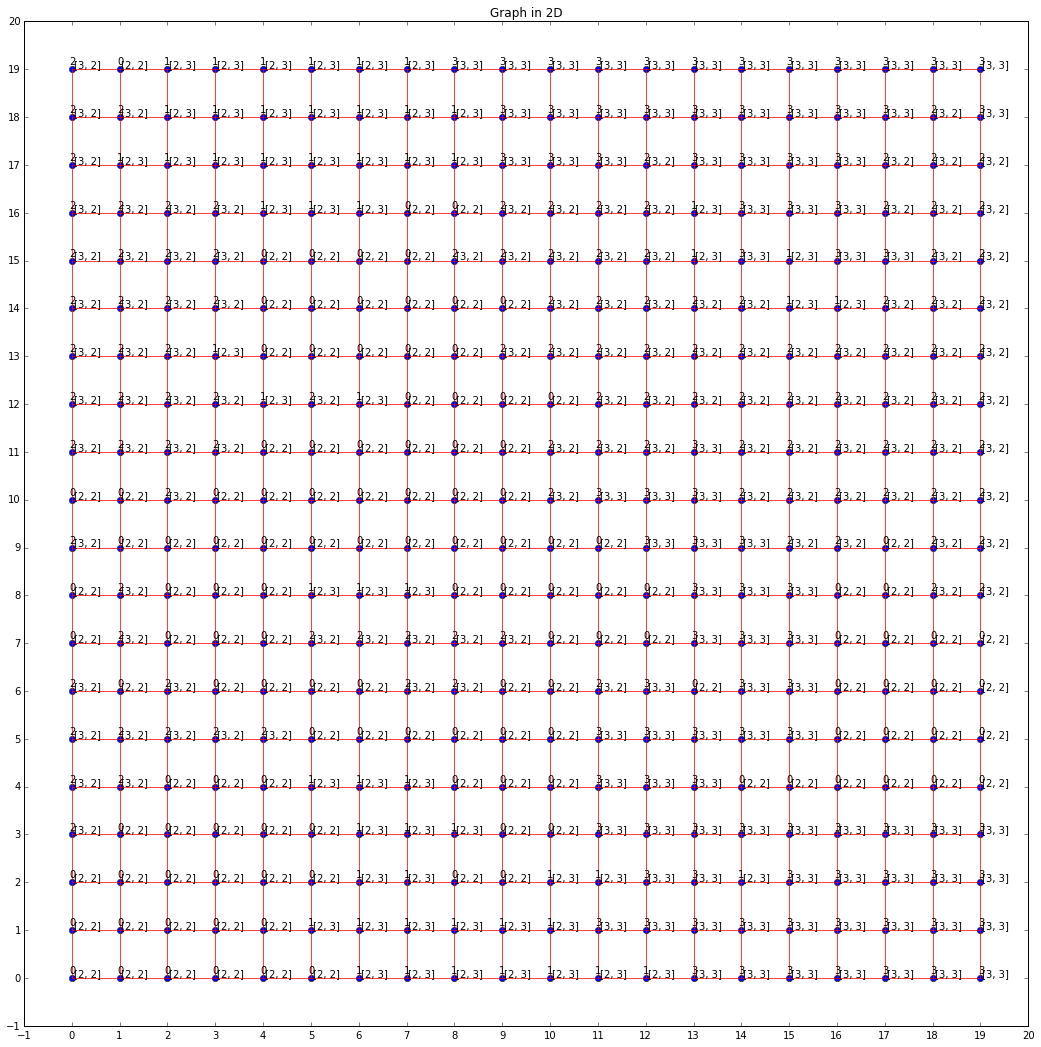

In [24]:
model.runSimulation()
graph.visualizeGraph2D(getColor)